# 前処理
- データ解析の８割は前処理
    - 欠損値への対応
    - カテゴリ変数のエンコーディング
    - 特徴量の正規化
- pandasとの違い
    - scikit-learnでは、クラスをインスタンス化してfitメソッドとtransformメソッドを用いて前処理が可能
    - scikit-learnでは、全体で統一的なインターフェースでわかりやすい

## 欠損値への対応
1. 除去
1. 補完

In [1]:
import numpy as np
import pandas as pd

# サンプルデータを作成
df = pd.DataFrame(
    {
        'A':[1,np.nan, 3, 4, 5],
        'B':[6, 7, 8, np.nan, 10],
        'C':[11, 12, 13, 14, 15]
    }
)

df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


### 欠損値の確認(isnullメソッド)

In [2]:
# 欠損値をを確認する
df.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


### 欠損値の除去(dropnaメソッド,fillnaメソッド)

In [3]:
# 欠損値がある行を削除
df.dropna()

,A,B,C
0,1.0,6.0,11
2,3.0,8.0,13
4,5.0,10.0,15


In [4]:
# 欠損値を0で埋める
df.fillna(0)

,A,B,C
0,1.0,6.0,11
1,0.0,7.0,12
2,3.0,8.0,13
3,4.0,0.0,14
4,5.0,10.0,15


In [5]:
# 欠損値を１つ手前の値で補完する
df.fillna(method='ffill')

,A,B,C
0,1.0,6.0,11
1,1.0,7.0,12
2,3.0,8.0,13
3,4.0,8.0,14
4,5.0,10.0,15


### 欠損値の補完(SimpleImputer)

In [6]:
# 欠損値の補完
# 列ごとに平均を計算して補完する

from sklearn.impute import SimpleImputer

# 平均値で欠損値を補完するインスタンスを作成
imp = SimpleImputer(strategy='mean') # mean,median,most_frequentを選択できる

# 欠損値を補完
imp.fit(df)
imp.transform(df)

array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

## カテゴリ変数のエンコーディング
- 2つの方法がある
    - カテゴリ変数のエンコーディング（a→0,b→1,c→2...）
    - One-hotエンコーディング

In [7]:
import pandas as pd

df = pd.DataFrame(
    {
        'A':[1,2,3,4,5],
        'B':['a','b','a','b','c']
    }
)

df

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,c


### エンコーディング（LabelEncoder）

In [8]:
from sklearn.preprocessing import LabelEncoder

# ラベルエンコーダーのインスタンスを生成
le = LabelEncoder()

# ラベルのエンコーディング
le.fit(df['B'])
le.transform(df['B'])

array([0, 1, 0, 1, 2])

In [9]:
# 返還された値と元の値の対応は、LabelEncoderのインスタンスのclasses_属性で確認できる

le.classes_

array(['a', 'b', 'c'], dtype=object)

### One-hotエンコーディング(sklearnでやる場合)

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# DataFrameをコピー
df_ohe = df.copy()

# ラベルエンコーダーのインスタンスを生成
le = LabelEncoder()

# ラベルのエンコーディング
le.fit(df_ohe['B'])
df_ohe['B'] = le.transform(df_ohe['B'])

# One-hotエンコーダのインスタンス化
ohe = ColumnTransformer([("OneHotEncoder", OneHotEncoder(), [1])],remainder='passthrough')

ohe.fit_transform(df_ohe)

array([[1., 0., 0., 1.],
       [0., 1., 0., 2.],
       [1., 0., 0., 3.],
       [0., 1., 0., 4.],
       [0., 0., 1., 5.]])

### One-hotエンコーディング（pd.get_dummiesのほうが一発でできる）

In [11]:
pd.get_dummies(df)

,A,B_a,B_b,B_c
0,1,1,0,0
1,2,0,1,0
2,3,1,0,0
3,4,0,1,0
4,5,0,0,1


## 特徴量の正規化
- 分散正規化
- 最小最大正規化

### 分散正規化
- 特徴量の平均が０、標準偏差が１となるように特徴量を変換する処理
- 標準化やz変換と呼ばれる
- x' = (x - μ) / σ
    - x'：分散正規化された特徴量
    - μ：特徴量の平均
    - σ：標準偏差

In [12]:
import pandas as pd

df = pd.DataFrame(
    {
        'A':[1,2,3,4,5],
        'B':[100,200,400,500,800]
    }
)

df

,A,B
0,1,100
1,2,200
2,3,400
3,4,500
4,5,800


In [13]:
from sklearn.preprocessing import StandardScaler

# 分散正規化のインスタンスを生成
stdsc = StandardScaler()

# 分散正規化を実行
stdsc.fit(df)
stdsc.transform(df)

array([[-1.41421356, -1.22474487],
       [-0.70710678, -0.81649658],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.40824829],
       [ 1.41421356,  1.63299316]])

### 最小最大正規化(preprocessingモジュールのMinMaxScalerクラス)
- 特徴量の最小値が0,最大値が1をとるように特徴量を正規化する処理
- x' = (x - x_min) / (x_max - x_min)
    - x：特徴量
    - x'：最小最大正規化された特徴量
    - x_min：特徴量の最小値
    - x_max：特徴量の最大値
    
    

In [14]:
from sklearn.preprocessing import MinMaxScaler

# 最小最大正規化のインスタンスを生成
mmsc = MinMaxScaler()

# 最小最大正規化を実行
mmsc.fit(df)
mmsc.transform(df)

array([[0.        , 0.        ],
       [0.25      , 0.14285714],
       [0.5       , 0.42857143],
       [0.75      , 0.57142857],
       [1.        , 1.        ]])

# 分類
- 分類はデータの「クラス」を予測して分けるタスク
- 教師あり学習の典型的なタスク（回帰も教師あり学習）
- さまざまなアルゴリズムがある
    - サポートベクタマシン
    - 決定木
    - ランダムフォレスト

## データ準備（load_iris,train_test_split）

In [15]:
from sklearn.datasets import load_iris
# Irisデータセットを読み込む
iris = load_iris()
X,y = iris.data, iris.target

print('X:')
print(X[:5,:])
print('y:')
print(y[:5])

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


In [16]:
from sklearn.model_selection import train_test_split
# 学習データとテストデータに分割
# test_size=0.3にすると、もともと150行あるデータを3:7の比率で分けてくれる。
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

# random_state=123でシード値を指定してあげると再現できるようになるけど、通常はしない
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


## サポートベクタマシン（SVM）
- 分類、回帰だけでなく外れ値検出にも使えるアルゴリズム
- 分類に用いるサポートベクタマシンについて説明
- 線形分離できないデータを高次元の空間に移して線形分離することにより、分類を行うアルゴリズム
- 実際には、高次元の空間に移しているのではなく、データの近さを定量化するカーネルを導入している
    - カーネル：高次元の降雨感でのデータ間の内積を計算する関数に相当
- 用語
    - 決定境界：クラスを分離する直線
    - サポートベクタ：各クラスのデータのこと
    - マージン：クラス間のサポートベクタの距離

### 簡単な例

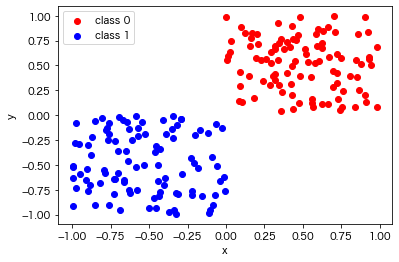

In [17]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

# X軸Y軸ともに０〜１までの一葉分布から100点をサンプリング
X0 = np.random.uniform(size=(100,2))
y0 = np.repeat(0,100)

# X軸Y軸ともに−１〜０までの一葉分布から100点をサンプリング
X1 = np.random.uniform(-1,0,size=(100,2))
y1 = np.repeat(1,100)

# 散布図にプロット
fig, ax = plt.subplots()

ax.scatter(X0[:,0],X0[:,1], marker='o', color='r',label='class 0')
ax.scatter(X1[:,0],X1[:,1], marker='o', color='b',label='class 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.legend()
plt.show()

In [18]:
from sklearn.svm import SVC
# 学習、および決定境界、マージン、サポートベクタを可視化する関数
def plot_boundary_margin_sv(X0,y0,X1,y1,kernel,C,xmin=-1,xmax=1,ymin=-1,ymax=1):
    # サポートベクタマシンのインスタンス化
    svc = SVC(kernel=kernel, C=C)
    # 学習
    svc.fit(np.vstack((X0,X1)),np.hstack((y0,y1)))
    
    fig,ax = plt.subplots()
    ax.scatter(X0[:,0],X0[:,1], color='r',label='class 0')
    ax.scatter(X1[:,0],X1[:,1], color='b',label='class 1')
    
    # 決定境界とマージンをプロット
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100)) # np.linespace()は等差数列 np.meshgrid(x,y)で格子状の配列を返す
    xy = np.vstack([xx.ravel(), yy.ravel()]).T # np.ravel(a)とa.ravel()は同じことができる。多次元配列を１次元配列に変換する。np.flatten(a)でもできるが、こちらは新しい配列を生成しているため、元の配列をいじっても影響されないが、動作が重たい
    
    p = svc.decision_function(xy).reshape((100,100))
    ax.contour(xx,yy,p,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    
    # サポートベクタをプロット
    ax.scatter(svc.support_vectors_[:,0],
               svc.support_vectors_[:,1],
               s=250,facecolors='none',
               edgecolors='black')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    plt.show()

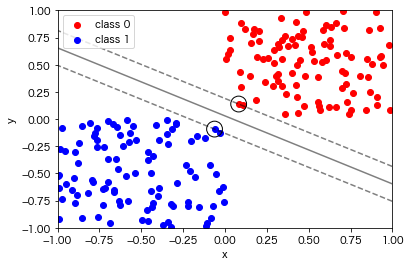

In [19]:
plot_boundary_margin_sv(X0,y0,X1,y1,kernel='linear',C=1e6)

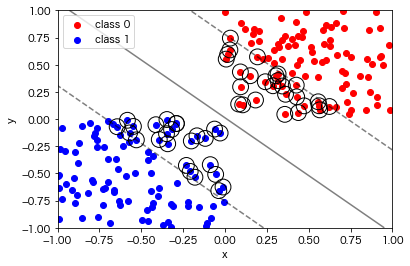

In [20]:
# c=0.1とすると....
plot_boundary_margin_sv(X0,y0,X1,y1,kernel='linear',C=0.1)

- SVCクラスをインスタンス化する際にパラメータCを設定する。
    - Cは「どれだけマージンを広く（or狭く）設定するか」を表す
    - Cを広くすると、マージンが大きくなりmサポートベクタの個数が増える

### 直線では分離できない例
- 以下のように分けたいときは、直線では分離できない
    - クラス１：y >  2(x-0.5)^2
    - クラス0：y <= 2(x-0.5)^2
- SVCクラスをインスタンス化するときにパラメータkernel='rdf'を指定するよ
    - rdf：同径基底関数(radial basis function)

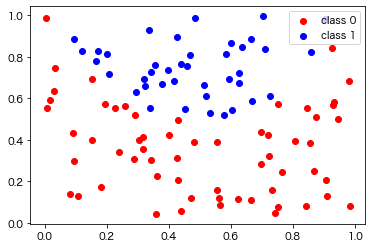

In [21]:
np.random.seed(123)
X = np.random.random(size=(100,2))
y = (X[:,1] > 2*(X[:,0]-0.5)**2 + 0.5).astype(int)

fig, ax = plt.subplots()
ax.scatter(X[y == 0,0],X[y == 0,1], color='r',label='class 0')
ax.scatter(X[y == 1,0],X[y == 1,1], color='b',label='class 1')

ax.legend()
plt.show()

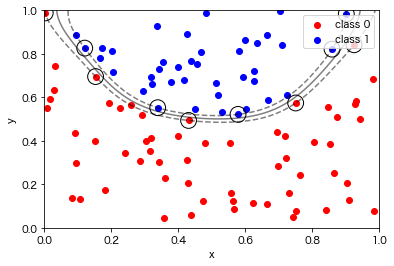

In [22]:
# 決定境界、マージン、サポートベクタをプロット
X0,X1 = X[y == 0,:],X[y == 1,:]
y0,y1 = y[y == 0],y[y == 1]

plot_boundary_margin_sv(X0,y0,X1,y1,kernel='rbf',C=1e3,xmin=0,ymin=0)

## 決定技（decision tree）
- 用語紹介
    - ノード；木の頂点。
        - 親ノード、子ノード：一段階上（または下）のノードをそうやって表現する
        - 根ノード(root node)：木の最上部にあり、親ノードを持たないノード
        - 葉ノード(leaf node)：木の最下部にあり、子ノードを持たないノード
    - エッジ：ノードを結ぶ線
    - 情報利得：データを分割することでどれだけ得をするのか
        - 情報利得 = 親ノードの不純度 - 子ノードの不純度
        - 情報利得が正の場合、親ノードをもっと分割したほうがいい
    - 不純度：「どれだけクラスが混在しているか」を表す指標。いろんな指標がある
        - ジニ不純度：sklearnのデフォルト
        - エントロピー
        - 分類誤差

### ジニ不純度
- 例：
    - 1000人の顧客がいて、離反した顧客が100名、離反しなかった顧客が900名
    - 最終利用から経過日数が10日以上の顧客は600人、離反した顧客が90名、離反しなかった顧客は510名
    - 最終利用から経過日数が10日未満の顧客は400人、離反した顧客が10名、離反しなかった顧客は390名
- 木のデータ構造はこんな感じになる
    - 最終利用からの経過日数（親ノード）
        - 10日以上（エッジ）
            - 離反しない:510
            - 離反した:90
        - 10日未満（エッジ）
            - 離反しない:390
            - 離反した:10
- 親ノードのジニ不純度
    - 1 - ((100/1000)^2 + (900/1000)^2) = 0.18
- 子ノードのジニ不純度（10日以上）側
    - 1 - ((510/600)^2 + (90/600)^2) = 0.255
- 子ノードのジニ不純度（10日未満）側
    - 1 - ((10/400)^2 + (390/400)^2) = 0.04875
- 情報利得 = 0.18 - 600/1000 * 0.255 - 400/1000 * 0.04875 = 0.0075
- この例では情報利得が正なので、親ノードを分割した方が良い

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Irisデータセットを読み込む
iris = load_iris()
X,y = iris.data, iris.target

# 学習データセットとテストデータセットに分割する
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

# 決定木をインスタンス化する（木の最大の深さ=3）
tree = DecisionTreeClassifier(max_depth=3)

# 学習
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [25]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

# dot形式のデータを抽出
dot_data = export_graphviz(tree, filled=True,rounded=True,class_names=['Setosa','Versicolor','virginica'],feature_names=['Sepal Length','Sepal Width','Petal Length','Petal Width'], out_file=None)

# 決定木のプロットを出力
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [26]:
# 予測
y_pred = tree.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

## ランダムフォレスト(ensembleモジュールのRandomForestClassifierクラス)
- データのサンプルと特徴量をランダムに選択して、決定木を構築する処理を複数回繰り返し、各木の推定結果の多数決や平均値により分類・回帰を行う手法
- ランダムに選択されたサンプルと特徴量のデータをブートストラップデータと呼ぶ
- ランダムフォレストは決定木のアンサンブルであり、複数の学習器を用いた学習方法はアンサンブル学習と呼ばれる
- RandomForestClassfierクラスをインスタンス化する際に、パラメータn_estimatorsで決定木の個数を指定する

In [28]:
from sklearn.ensemble import RandomForestClassifier
# ランダムフォレストをインスタンス化する
forest = RandomForestClassifier(n_estimators=100,random_state=123)

# 学習
forest.fit(X_train,y_train)

# 予測
y_pred = forest.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

# 回帰
- 回帰とは、ある値を別の単一または複数の値で説明するタスク
- 線形回帰は、y = a_0 + a_1x_1 + ..... + a_px_p　で示される
    - 方法として、最尤法や最小二乗法などがある
    - 線形とよばれているのは、目的変数yが説明変数の値の一次式の和で表されているため
    - 説明変数が１つの場合を単回帰、複数の場合を重回帰と呼ぶ

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Bostonデータセットを読み込む
boston = load_boston()
X,y = boston.data,boston.target

# 学習データとテストデータに分割
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

# 線形回帰をインスタンス化
lr = LinearRegression()

# 学習
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
# テストデータを予測
y_pred = lr.predict(X_test)

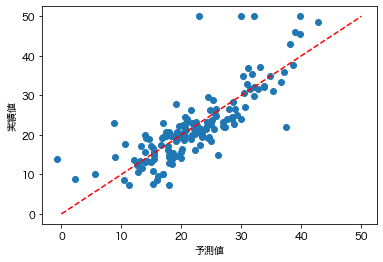

In [34]:
import matplotlib.pyplot as plt
# 横軸を予測値、縦軸を実績値とする散布図をプロットする
fkg,ax = plt.subplots()

ax.scatter(y_pred,y_test)

ax.plot((0,50),(0,50),linestyle='dashed',color='r')

ax.set_xlabel('予測値')
ax.set_ylabel('実績値')

plt.show()

# 次元削減
- データが持っている情報をなるべく損ねることなく、次元を削減してデータを圧縮するタスク
    - 主成分分析    

# モデルの評価
- 機械学習を用いて構築したモデルの良し悪しを評価する指標は数多く提案されている
- 分類と回帰のそれぞれに対して評価指標がある
- 分類の代表的な指標
    - カテゴリの分類精度
        - 適合率、
        - 交差検証
    - 予測確率の正確さ
        -  ROC曲線

# ハイパーパラメータの最適化
- 機械学習のアルゴリズムにはハイパーパラメータと呼ばれるユーザが指定する値がある
    - 例えば、決定木における木の深さ、ランダムフォレストに含まれる決定木の個数
- ハイパーパラメータを最適化する代表的な方法
    - グリッドサーチ
    - ランダムサーチ

# クラスタリング
- ある基準を設定してデータ間の類似性を計算し、データをクラスタにまとめるタスク
- 教師なし学習の典型的なタスク
- クラスタリングのアルゴリズムとして２つ挙げる
    - k-means
    - 階層的クラスタリング